In [1]:
# pip install gensim
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import string


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lecle\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# Fonction d'élimination des stop words et de lemmatization

stop_words = set(stopwords.words('english')) 

def remove_stop_words_and_lemmatize(sentence): 
  words = sentence.split() 
  filtered_words = []
  i = 0
  for word in words:
    i += 1
    if word not in stop_words:
      filtered_words.append(lemmatizer.lemmatize(word))
  return ' '.join(filtered_words)

In [3]:
harry_potter_text = open("./Harry_Potter.txt", encoding="utf8", mode='r').read()
harry_potter_text = remove_stop_words_and_lemmatize(harry_potter_text)
tokenized_corpus = word_tokenize(harry_potter_text.lower())

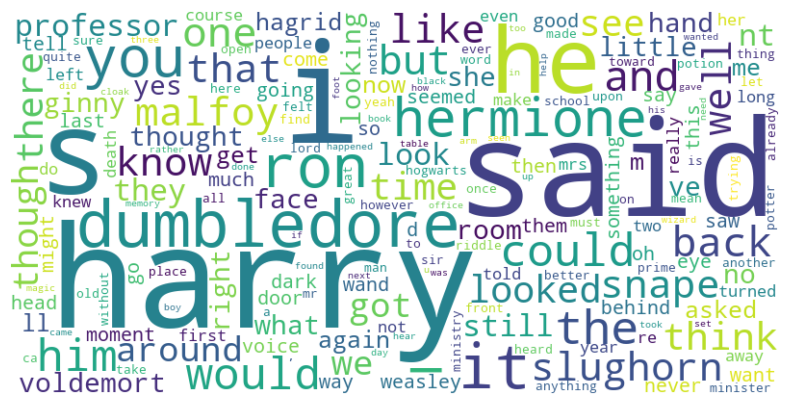

In [4]:
corpus_without_punctuation = [token.translate(str.maketrans("", "", string.punctuation)) for token in tokenized_corpus]
words_frequencies = Counter(corpus_without_punctuation)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words_frequencies)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [5]:
# Définition du modèle Word2Vec
# vector_size : chaque mot sera représenté par un vecteur à N dimensions, plus il y a de dimensions, plus il y a de relation entre le mot et le contexte
# window : taille de la fenetre des mots contextuelle pour l'apprentisage, N mots à gauche et N mots à droite
model = Word2Vec(sentences=[tokenized_corpus], vector_size=10, window=10, min_count=1, workers=4)

# Entraînement du modèle
model.train([tokenized_corpus], total_examples=1, epochs=40)

(400000, 5986600)

In [6]:
# Rechercher des mots similaires
similar_words = model.wv.most_similar('attack', topn=10)
print(similar_words)

[('fell', 0.9930515885353088), ('remain', 0.9923032522201538), ('supposed', 0.9917747974395752), ('many', 0.9916415810585022), ('sentence', 0.9903730750083923), ('trespass', 0.9899885654449463), ('consent', 0.989937424659729), ('seemed', 0.9897552728652954), ('reveal', 0.9895331859588623), ('simple', 0.9893575310707092)]


In [7]:
# Rechercher des mots similaires
similar_words = model.wv.most_similar('love', topn=10)
print(similar_words)

[('mortality', 0.8867321014404297), ('undetected', 0.886689305305481), ('admire', 0.8601497411727905), ('patched', 0.85849928855896), ('hur-rying', 0.8563030958175659), ('jus', 0.8546685576438904), ('pardon', 0.8535359501838684), ('hesitantly', 0.8452954888343811), ('deal', 0.8432720303535461), ("'right", 0.8325797319412231)]


In [8]:
# Rechercher des mots similaires
similar_words = model.wv.most_similar('voldemort', topn=20)
print(similar_words)

[('prophecy', 0.9871976971626282), ('stone', 0.9869529008865356), ('injuries', 0.9867601990699768), (':', 0.9847487807273865), ('explanation', 0.9841655492782593), ('witch', 0.9840587377548218), ('currently', 0.9830725193023682), ('waited', 0.9828744530677795), ('fly', 0.9825881719589233), ('sixteen', 0.9825311899185181), ('becomes', 0.9819713234901428), ('whereabouts', 0.9807577133178711), ('mark', 0.9807167649269104), ('believe', 0.9800363779067993), ('warfare', 0.9799525141716003), ('evoked', 0.9797786474227905), ('many', 0.9797490835189819), ('struck', 0.9796448349952698), ('attempting', 0.9792184233665466), ('snapped', 0.9787483811378479)]


In [9]:
similarity_score = model.wv.similarity('crime', 'voldemort')
print(similarity_score)

0.90648365


In [10]:
similarity_score = model.wv.similarity('quidditch', 'voldemort')
print(similarity_score)

-0.12966822


In [11]:
odd_word = model.wv.doesnt_match(['harry', 'voldemor', 'quidditch', 'dead', 'parents'])
print(odd_word)

quidditch


In [12]:
most_similar_word = model.wv.most_similar_to_given('voldemort', ['quidditch', 'dinner', 'dangerous', 'forest'])
print(most_similar_word)

dangerous
